In [1]:
import shutil
import os
import numpy as np

import easyocr
reader= easyocr.Reader(['en'],gpu=False)

from keras.models import load_model
import keras
from keras.preprocessing import image
model = load_model("cnn_model.h5")

Using CPU. Note: This module is much faster with a GPU.
Using TensorFlow backend.


In [2]:
from flask import Flask
from flask import render_template,request,redirect, url_for

SignatureApp = Flask(__name__)

In [ ]:
APP_ROOT= os.path.dirname(os.path.abspath('__file__'))
@SignatureApp.route('/')
def upload_form():
    return render_template('index.html')

@SignatureApp.route('/', methods=['POST'])
def upload_form_post():
            
            target= os.path.join(APP_ROOT,'images/')
        
            if os.path.isdir(target):
                shutil.rmtree(target)
                
            if not os.path.isdir(target):
                os.mkdir(target)
            
            for file in request.files.getlist("file"):
                #print(file)
                filename= file.filename
                destination = "/".join([target,filename])
                #print(destination)
                file.save(destination)
            
            for img_file in os.listdir('images'):
                test_image = image.load_img(img_file)
                
                # OCR gives the list of all the text objects found in the document, retrieve necessary fields
                bounds= reader.readtext("/".join([target,img_file])) 
                form_type= bounds[0][1]
                form_name= bounds[5][1]
                username =bounds[6][1]
                bank_branch= bounds[25][1]
                telephone = bounds[8][1]
                mobile_no= bounds[9][1]

                cropped_img = test_image.crop((80, 1180, 1300, 1300))

                cropped_img_sign = cropped_img.crop((0,2,400,105))

                cropped_img_sign.save("/".join([target,"sign.jpg"]))

            # CNN is trained on image size 150,220 so read the image in  that specific size
            test_image_cr = image.load_img("images/sign.jpg", target_size = (150, 220))
            test_image_cr = image.img_to_array(test_image_cr)
            test_image_cr = np.expand_dims(test_image_cr, axis = 0)
            result = model.predict(test_image_cr)
            if result[0][0] >= 0.5:
                prediction = 'Genuine'
            else:
                prediction = 'forged'
            
            return render_template('uploadDataDemo.html',prediction=prediction,username=username,form_type=form_type,form_name=form_name,bank_branch=bank_branch,telephone=telephone,mobile_no=mobile_no)
    
if __name__ == '__main__':
    SignatureApp.run(host='localhost', port=9177)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://localhost:9177/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Mar/2021 13:15:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Mar/2021 13:22:12] "POST / HTTP/1.1" 200 -


In [1]:
#exploring OCR library
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('editsig.jpg')

Using TensorFlow backend.


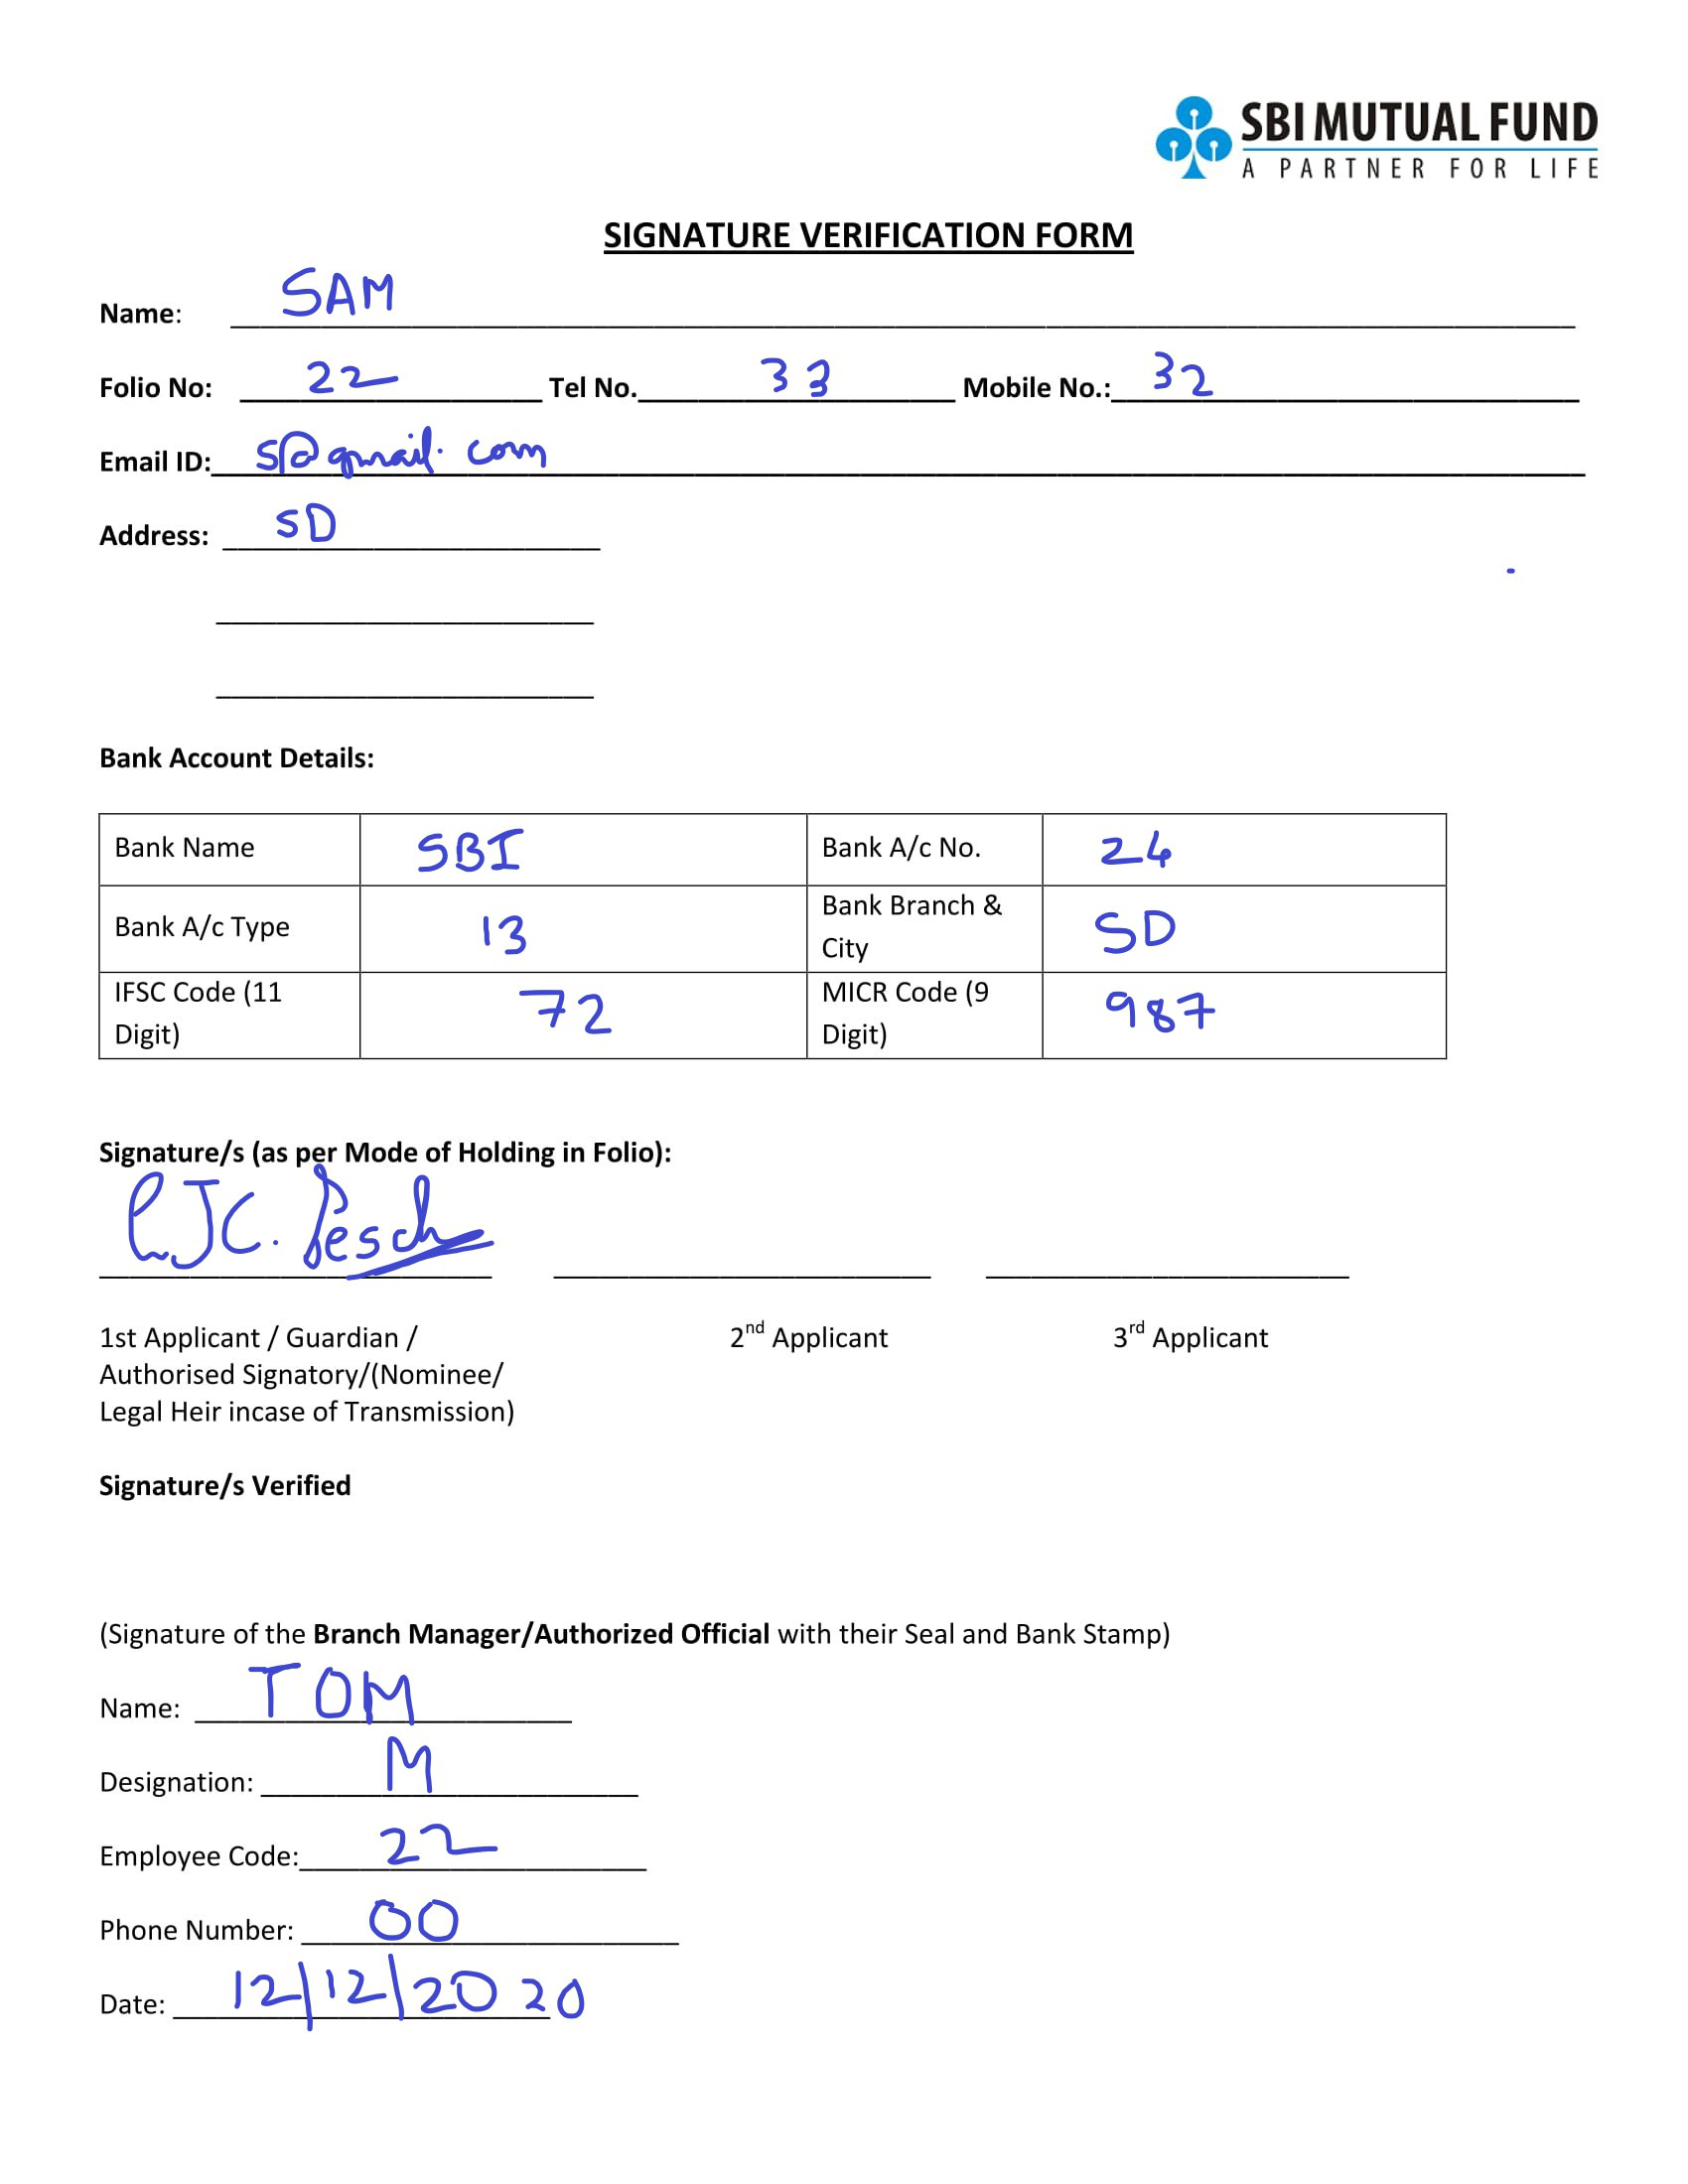

In [2]:
test_image

In [5]:
bounds= reader.readtext('editsig.jpg')

In [32]:
bounds[0][1]

'SBIMUTUAL FUND'

In [7]:
bounds

[([[1244, 96], [1618, 96], [1618, 150], [1244, 150]],
  'SBIMUTUAL FUND',
  0.4223364591598511),
 ([[1284, 154], [1440, 154], [1440, 186], [1284, 186]],
  'PAR TNE R',
  0.05435551330447197),
 ([[1536, 154], [1616, 154], [1616, 186], [1536, 186]],
  'LlF E',
  0.1621578335762024),
 ([[1454, 156], [1524, 156], [1524, 186], [1454, 186]],
  'F0 R',
  0.31224510073661804),
 ([[1250, 158], [1266, 158], [1266, 182], [1250, 182]],
  'A',
  0.9912237524986267),
 ([[605, 219], [1146, 219], [1146, 257], [605, 257]],
  'SIGNATURE VERIFICATIONFORM',
  0.3137296736240387),
 ([[281, 263], [407, 263], [407, 325], [281, 325]], 'SAM', 0.7983977794647217),
 ([[98, 302], [186, 302], [186, 330], [98, 330]], 'Name:', 0.6251120567321777),
 ([[769.800239928024, 349.12117564731756],
   [846.4370988399716, 359.4626872080133],
   [837.199760071976, 409.87882435268244],
   [760.5629011600284, 399.5373127919867]],
  '3 3',
  0.42083975672721863),
 ([[1156, 350], [1226, 350], [1226, 404], [1156, 404]],
  '32',
  0

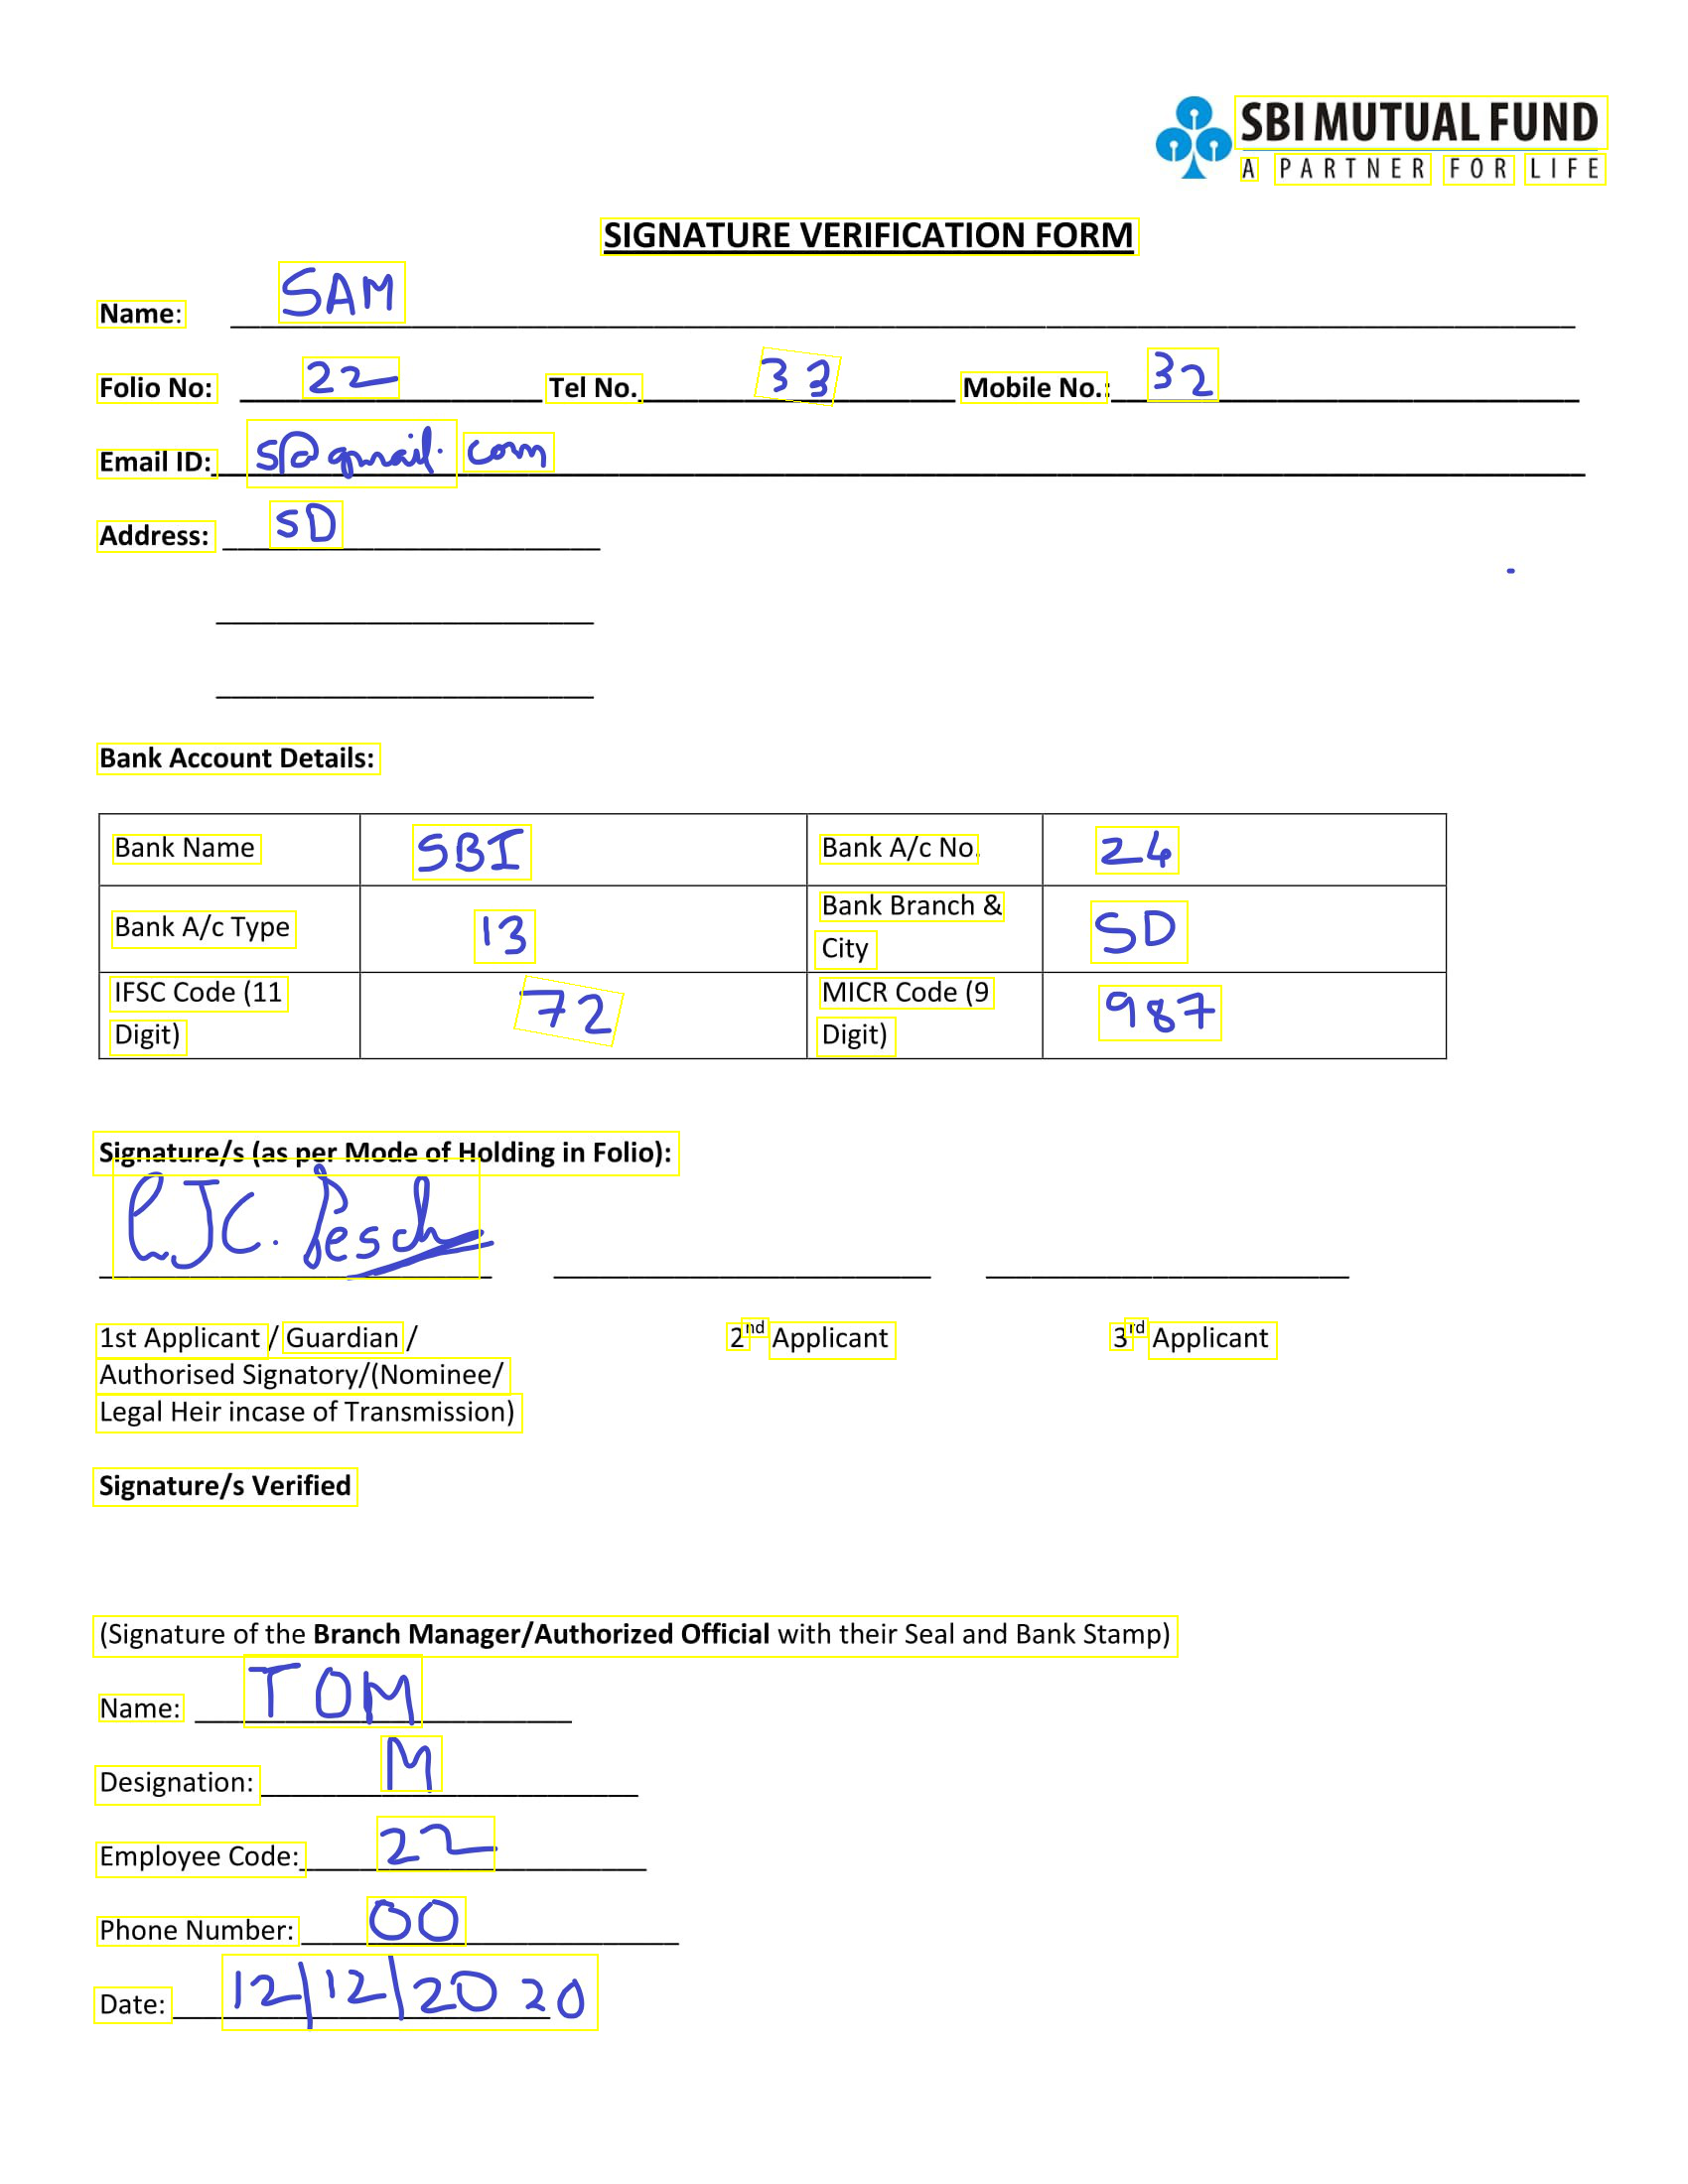

In [8]:
from PIL import ImageDraw

def draw_boxes(image,bounds, color='yellow',width=2):
    draw= ImageDraw.Draw(image)
    for bound in bounds:
        p0,p1,p2,p3= bound[0]
        draw.line([*p0,*p1,*p2,*p3,*p0],fill=color, width= width)
    return image
draw_boxes(test_image,bounds)

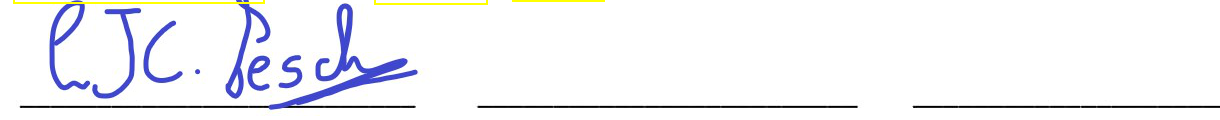

In [9]:
cropped_img = test_image.crop((80, 1180, 1300, 1300))
cropped_img

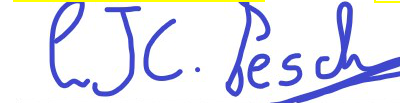

In [10]:
cropped_img1= cropped_img.crop((0,2,400,105))
cropped_img1